# Arinthi - M-Ighty EWS Use Case.

Arinti : https://arinti.ai - Wouter Baetens

M-Igthy : http://www.m-ighty.com/



EWS stands for Early warning score (info: https://en.wikipedia.org/wiki/Early_warning_score)

#### Data:

Dataset : 20200124_ews_observations.csv, anonimized EWS patient data from the Royal Papworth Hospital (https://royalpapworth.nhs.uk/).

###### Column Legend:

PatientId: Unique identifier for the patient

ObservationDate: Date of the observation

EwsProcedure: Which EWS procedure has been used (> in your dataset, this will normally always be NEWS2.0)

EWS_Total: Total EWS score

SBP: Systolic Blood Pressure

SBP_Score: Contribution of SBP parameter to total EWS score

LOC: Level Of Consciousness

LOC_Score: Contribution of LOC parameter to total EWS score

SpO2: Peripheral capillary oxygen saturation (the amount of oxygen in the blood)

SpO2_Score: Contribution of SpO2 parameter to total EWS score

Add_O2: Is the patient receiving additional oxygen or not

Add_O2_Score: Contribution of Add_O2 parameter to total EWS score

HR: Heartrate

HR_Score: Contribution of HR parameter to total EWS score

RR: Respiratory Rate

RR_Score: Contribution of RR parameter to total EWS score

TEMP: Patient body temperature

TEMP_Score: Contribution of TEMP parameter to total EWS score



## Variables studied

Load dataset:

In [1]:
import pandas as pd
import numpy as np

#df = pd.read_csv('20200124_ews_observations.csv', dtype={'SpO2_Score': np.float32})
df = pd.read_csv('20200124_ews_observations.csv', low_memory=False)

In [2]:
df.T

,0,1,2,3,4,5,6,7,8,9,...,171726,171727,171728,171729,171730,171731,171732,171733,171734,171735
PatientId,29,30,31,32,33,32,34,35,32,36,...,10239,20355,4735,20532,20480,20278,20480,2499,20527,4853
ObservationDate,2019-05-01 13:27:50.0000000,2019-05-01 15:27:44.0000000,2019-05-01 15:54:27.0000000,2019-05-01 16:07:27.0000000,2019-05-01 17:03:16.0000000,2019-05-01 18:02:29.0000000,2019-05-01 19:23:49.0000000,2019-05-01 21:07:36.0000000,2019-05-01 21:08:05.0000000,2019-05-01 21:12:11.0000000,...,2020-01-02 08:39:12.0000000,2020-01-02 08:40:42.0000000,2020-01-02 08:44:24.0000000,2020-01-02 08:46:42.0000000,2020-01-02 08:48:53.0000000,2020-01-02 08:57:05.0000000,2020-01-02 08:58:46.0000000,2020-01-02 09:03:14.0000000,2020-01-02 09:03:20.0000000,2020-01-02 09:03:56.0000000
EwsProcedure,NEWS2,NEWS2,NEWS2,NEWS2,NEWS2,NEWS2,NEWS2,NEWS2,NEWS2,NEWS2,...,NEWS2,NEWS2,NEWS2,NEWS2,NEWS2,NEWS2,NEWS2,NEWS2,NEWS2,NEWS2
EWS_Total,0,3,1,0,0,0,0,0,0,2,...,3,0,8,1,2,3,3,0,0,1
SBP,143,NaN,117,NaN,135,NaN,NaN,NaN,125,NaN,...,90,NaN,147,145,137,88,83,118,129,133
SBP_Score,0,NaN,0,NaN,0,NaN,NaN,NaN,0,NaN,...,3,NaN,0,0,0,3,3,0,0,0
LOC,ALERT,ALERT,ALERT,ALERT,ALERT,ALERT,ALERT,ALERT,ALERT,ALERT,...,ALERT,ALERT,ALERT,ALERT,ALERT,ALERT,ALERT,ALERT,ALERT,ALERT
LOC_Score,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
SpO2,96,94,95,98,97,96,97,98,97,97,...,88,98,89,99,97,100,92,98,98,98
SpO2_Score,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
df.shape

(171736, 18)

We have 171736 rows, 17 features and 1 target (EWS_Total).

In [4]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
PatientId,171736,NaN,NaN,NaN,5174.34,3613.34,29,2263,4764,7549,20532
ObservationDate,171736,170783,2019-11-26 06:03:48.0000000,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EwsProcedure,171736,1,NEWS2,171736,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EWS_Total,171736,NaN,NaN,NaN,1.92954,1.89039,0,0,1,3,19
SBP,160949,NaN,NaN,NaN,120.689,19.5999,0,107,119,133,234
SBP_Score,160949,NaN,NaN,NaN,0.499096,0.813013,0,0,0,1,3
LOC,171736,5,ALERT,171079,NaN,NaN,NaN,NaN,NaN,NaN,NaN
LOC_Score,171736,NaN,NaN,NaN,0.0114769,0.185201,0,0,0,0,3
SpO2,171734,NaN,NaN,NaN,95.9474,3.77799,0,95,96,98,100
SpO2_Score,171734,NaN,NaN,NaN,0.355928,0.690071,0,0,0,1,3


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171736 entries, 0 to 171735
Data columns (total 18 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   PatientId        171736 non-null  int64  
 1   ObservationDate  171736 non-null  object 
 2   EwsProcedure     171736 non-null  object 
 3   EWS_Total        171736 non-null  int64  
 4   SBP              160949 non-null  float64
 5   SBP_Score        160949 non-null  float64
 6   LOC              171736 non-null  object 
 7   LOC_Score        171736 non-null  int64  
 8   SpO2             171734 non-null  float64
 9   SpO2_Score       171734 non-null  float64
 10  Add_O2           171734 non-null  object 
 11  Add_O2_Score     171734 non-null  float64
 12  HR               171736 non-null  int64  
 13  HR_Score         171736 non-null  int64  
 14  RR               171736 non-null  int64  
 15  RR_Score         171736 non-null  int64  
 16  TEMP             171736 non-null  floa

In [6]:
df.columns

Index(['PatientId', 'ObservationDate', 'EwsProcedure', 'EWS_Total', 'SBP',
       'SBP_Score', 'LOC', 'LOC_Score', 'SpO2', 'SpO2_Score', 'Add_O2',
       'Add_O2_Score', 'HR', 'HR_Score', 'RR', 'RR_Score', 'TEMP',
       'TEMP_Score'],
      dtype='object')

In [7]:
df.dtypes

PatientId            int64
ObservationDate     object
EwsProcedure        object
EWS_Total            int64
SBP                float64
SBP_Score          float64
LOC                 object
LOC_Score            int64
SpO2               float64
SpO2_Score         float64
Add_O2              object
Add_O2_Score       float64
HR                   int64
HR_Score             int64
RR                   int64
RR_Score             int64
TEMP               float64
TEMP_Score           int64
dtype: object

In [8]:
df.index

RangeIndex(start=0, stop=171736, step=1)

In [9]:
df.isnull().sum(axis = 0)

PatientId              0
ObservationDate        0
EwsProcedure           0
EWS_Total              0
SBP                10787
SBP_Score          10787
LOC                    0
LOC_Score              0
SpO2                   2
SpO2_Score             2
Add_O2                 2
Add_O2_Score           2
HR                     0
HR_Score               0
RR                     0
RR_Score               0
TEMP                   0
TEMP_Score             0
dtype: int64

In [10]:
df.duplicated().any()

True

In [11]:
DuplicateRowsDF = df[df.duplicated()]
DuplicateRowsDF

,PatientId,ObservationDate,EwsProcedure,EWS_Total,SBP,SBP_Score,LOC,LOC_Score,SpO2,SpO2_Score,Add_O2,Add_O2_Score,HR,HR_Score,RR,RR_Score,TEMP,TEMP_Score
151,52,2019-05-03 18:46:40.0000000,NEWS2,1,NaN,NaN,ALERT,0,97.0,0.0,False,0.0,84,0,17,0,37.7,0
10734,942,2019-05-30 13:40:41.0000000,NEWS2,2,159.0,0.0,ALERT,0,98.0,0.0,True,2.0,79,0,18,0,38.0,0
17533,1365,2019-06-11 18:51:39.0000000,NEWS2,0,136.0,0.0,ALERT,0,97.0,0.0,False,0.0,86,0,17,0,36.5,0
17534,1241,2019-06-11 18:51:44.0000000,NEWS2,2,129.0,0.0,ALERT,0,89.0,0.0,True,2.0,84,0,17,0,37.3,0
17535,1146,2019-06-11 18:51:53.0000000,NEWS2,3,124.0,0.0,ALERT,0,91.0,3.0,False,0.0,80,0,19,0,37.8,0
17539,1519,2019-06-11 18:56:10.0000000,NEWS2,6,104.0,1.0,ALERT,0,24.0,3.0,True,2.0,66,0,12,0,36.8,0
17542,1494,2019-06-11 18:57:04.0000000,NEWS2,8,120.0,0.0,ALERT,0,85.0,3.0,True,2.0,84,0,25,3,36.6,0
17546,1376,2019-06-11 18:59:02.0000000,NEWS2,4,98.0,2.0,ALERT,0,92.0,2.0,False,0.0,61,0,18,0,36.4,0
17550,1023,2019-06-11 19:00:40.0000000,NEWS2,4,105.0,1.0,ALERT,0,96.0,0.0,True,2.0,94,1,16,0,36.8,0
101007,6798,2019-10-05 23:10:48.0000000,NEWS2,3,114.0,0.0,ALERT,0,92.0,2.0,False,0.0,96,1,15,0,37.3,0


In [12]:
df[df.duplicated() == True]

,PatientId,ObservationDate,EwsProcedure,EWS_Total,SBP,SBP_Score,LOC,LOC_Score,SpO2,SpO2_Score,Add_O2,Add_O2_Score,HR,HR_Score,RR,RR_Score,TEMP,TEMP_Score
151,52,2019-05-03 18:46:40.0000000,NEWS2,1,NaN,NaN,ALERT,0,97.0,0.0,False,0.0,84,0,17,0,37.7,0
10734,942,2019-05-30 13:40:41.0000000,NEWS2,2,159.0,0.0,ALERT,0,98.0,0.0,True,2.0,79,0,18,0,38.0,0
17533,1365,2019-06-11 18:51:39.0000000,NEWS2,0,136.0,0.0,ALERT,0,97.0,0.0,False,0.0,86,0,17,0,36.5,0
17534,1241,2019-06-11 18:51:44.0000000,NEWS2,2,129.0,0.0,ALERT,0,89.0,0.0,True,2.0,84,0,17,0,37.3,0
17535,1146,2019-06-11 18:51:53.0000000,NEWS2,3,124.0,0.0,ALERT,0,91.0,3.0,False,0.0,80,0,19,0,37.8,0
17539,1519,2019-06-11 18:56:10.0000000,NEWS2,6,104.0,1.0,ALERT,0,24.0,3.0,True,2.0,66,0,12,0,36.8,0
17542,1494,2019-06-11 18:57:04.0000000,NEWS2,8,120.0,0.0,ALERT,0,85.0,3.0,True,2.0,84,0,25,3,36.6,0
17546,1376,2019-06-11 18:59:02.0000000,NEWS2,4,98.0,2.0,ALERT,0,92.0,2.0,False,0.0,61,0,18,0,36.4,0
17550,1023,2019-06-11 19:00:40.0000000,NEWS2,4,105.0,1.0,ALERT,0,96.0,0.0,True,2.0,94,1,16,0,36.8,0
101007,6798,2019-10-05 23:10:48.0000000,NEWS2,3,114.0,0.0,ALERT,0,92.0,2.0,False,0.0,96,1,15,0,37.3,0


In [13]:
df[df.duplicated() == True].count()

PatientId          14
ObservationDate    14
EwsProcedure       14
EWS_Total          14
SBP                13
SBP_Score          13
LOC                14
LOC_Score          14
SpO2               14
SpO2_Score         14
Add_O2             14
Add_O2_Score       14
HR                 14
HR_Score           14
RR                 14
RR_Score           14
TEMP               14
TEMP_Score         14
dtype: int64

In [2]:
def UniqueValues(df):
    # Print the number of unique values of each column, only printing those that have less than 100 unique values

    col = df.columns.tolist()  # Redo this list because columns dropped
    NbrSamples = len(df)

    for c in col:
        s = sorted(set(df[c]))
        #s = set(df[c])
        count = len(s)
        if count == NbrSamples:
            print(f"\n {c} \n\nPossible Index: {count} unique values")
        elif count < 100:
            print(f"\n {c}: {s}")
        else:
            print(f"\n {c}: {count} unique values")



In [3]:
UniqueValues(df)


 PatientId: 10136 unique values

 ObservationDate: 170783 unique values

 EwsProcedure: ['NEWS2']

 EWS_Total: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 19]

 SBP: 10964 unique values

 SBP_Score: 10791 unique values

 LOC: ['ALERT', 'NEW_CONFUSION', 'PAIN', 'UNRESPONSIVE', 'VOICE']

 LOC_Score: [0, 3]

 SpO2: [0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, nan, nan, 7.0, 9.0, 10.0, 12.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 28.0, 32.0, 36.0, 40.0, 46.0, 50.0, 56.0, 60.0, 65.0, 66.0, 67.0, 68.0, 69.0, 70.0, 71.0, 72.0, 73.0, 74.0, 75.0, 76.0, 77.0, 78.0, 79.0, 80.0, 81.0, 82.0, 83.0, 84.0, 85.0, 86.0, 87.0, 88.0, 89.0, 90.0, 91.0, 92.0, 93.0, 94.0, 95.0, 96.0, 97.0, 98.0, 99.0, 100.0]

 SpO2_Score: [0.0, 1.0, 2.0, 3.0, nan, nan]

 Add_O2: [False, True, nan]

 Add_O2_Score: [0.0, nan, 2.0, nan]

 HR: 180 unique values

 HR_Score: [0, 1, 2, 3]

 RR: [0, 1, 2, 3, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 3

In [4]:
# Hart Rate
# see https://www.webmd.com/heart-disease/heart-failure/watching-rate-monitor#3)
# Maximum hart rate seems to depend on age. We do not have the patient age in the dataset !

HR = set(df['HR'])
print(len(HR))
HR

180


{20,
 22,
 23,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,
 185,
 186,
 187,
 188,
 189,
 190,
 191,
 192,
 194,
 196,
 198,
 199,
 200,
 208,
 210,
 239,
 252

In [18]:
# Count nbr of occurences of same patient (rows per patient)

NbrPatients = df.groupby(['PatientId'])['PatientId'].count().sort_values(ascending=False)

print(NbrPatients[NbrPatients == 1].count())
print(NbrPatients[NbrPatients == 2].count())

print(NbrPatients[NbrPatients < 10].count())
print(NbrPatients[NbrPatients < 100].count())

1662
905
6254
9897


In [19]:
df[df.Add_O2.isnull() == True]

,PatientId,ObservationDate,EwsProcedure,EWS_Total,SBP,SBP_Score,LOC,LOC_Score,SpO2,SpO2_Score,Add_O2,Add_O2_Score,HR,HR_Score,RR,RR_Score,TEMP,TEMP_Score
73869,4709,2019-08-29 15:44:39.0000000,NEWS2,1,133.0,0.0,ALERT,0,NaN,NaN,NaN,NaN,80,0,18,1,36.3,0
74294,5294,2019-08-30 07:37:17.0000000,NEWS2,5,80.0,2.0,ALERT,0,NaN,NaN,NaN,NaN,85,0,85,3,37.5,0


In [20]:
df.Add_O2.dtype

dtype('O')

In [21]:
type(df.Add_O2)

pandas.core.series.Series

In [22]:
print(df[df.PatientId == 4709].count())
print(df[df.PatientId == 5294].count())

PatientId          138
ObservationDate    138
EwsProcedure       138
EWS_Total          138
SBP                135
SBP_Score          135
LOC                138
LOC_Score          138
SpO2               137
SpO2_Score         137
Add_O2             137
Add_O2_Score       137
HR                 138
HR_Score           138
RR                 138
RR_Score           138
TEMP               138
TEMP_Score         138
dtype: int64
PatientId          2
ObservationDate    2
EwsProcedure       2
EWS_Total          2
SBP                2
SBP_Score          2
LOC                2
LOC_Score          2
SpO2               1
SpO2_Score         1
Add_O2             1
Add_O2_Score       1
HR                 2
HR_Score           2
RR                 2
RR_Score           2
TEMP               2
TEMP_Score         2
dtype: int64


###### from https://en.wikipedia.org/wiki/Early_warning_score :


Score	3	2	1	0	1	2	3

Respiratory rate (breaths/min)	>35	31-35	21-30	9-20			<7

SpO2 (%)	<85	85-89	90-92	>92

Temperature (C)		>38.9	38-38.9	36-37.9	35-35.9	34-34.9	<34

Systolic BP (mmHg)		>199		100-199	80-99	70-79	<70

Heart rate (bpm)	>129	110-129	100-109	50-99	40-49	30-39	<30

AVPU				Alert	Verbal	Pain	Unresponsive

In [23]:
# Check occurence of extreme values:
# see https://en.wikipedia.org/wiki/Clinical_death

display (df[(df.TEMP < 20.0) | (df.TEMP > 45.0)].count() )
display(df[(df.TEMP < 20.0) | (df.TEMP > 45.0)])

PatientId          9
ObservationDate    9
EwsProcedure       9
EWS_Total          9
SBP                9
SBP_Score          9
LOC                9
LOC_Score          9
SpO2               9
SpO2_Score         9
Add_O2             9
Add_O2_Score       9
HR                 9
HR_Score           9
RR                 9
RR_Score           9
TEMP               9
TEMP_Score         9
dtype: int64

,PatientId,ObservationDate,EwsProcedure,EWS_Total,SBP,SBP_Score,LOC,LOC_Score,SpO2,SpO2_Score,Add_O2,Add_O2_Score,HR,HR_Score,RR,RR_Score,TEMP,TEMP_Score
20440,1757,2019-06-16 13:30:33.0000000,NEWS2,5,93.0,2.0,ALERT,0,97.0,0.0,False,0.0,53,0,18,0,6.8,3
24017,1797,2019-06-21 09:46:40.0000000,NEWS2,9,99.0,2.0,ALERT,0,95.0,2.0,True,2.0,71,0,15,0,6.5,3
24451,1823,2019-06-21 20:13:06.0000000,NEWS2,4,157.0,0.0,ALERT,0,98.0,0.0,False,0.0,100,1,17,0,3.2,3
42378,3290,2019-07-15 20:39:40.0000000,NEWS2,3,150.0,0.0,ALERT,0,97.0,0.0,False,0.0,81,0,16,0,3.0,3
43313,3335,2019-07-17 04:49:21.0000000,NEWS2,3,150.0,0.0,ALERT,0,96.0,0.0,False,0.0,60,0,19,0,6.1,3
49041,3620,2019-07-24 10:06:52.0000000,NEWS2,5,103.0,1.0,ALERT,0,99.0,0.0,True,2.0,83,0,19,0,50.0,2
77165,2257,2019-09-03 13:43:35.0000000,NEWS2,5,102.0,1.0,ALERT,0,98.0,0.0,False,0.0,93,1,18,0,3.1,3
101414,6291,2019-10-06 13:28:00.0000000,NEWS2,4,135.0,0.0,ALERT,0,98.0,0.0,False,0.0,97,1,19,0,8.3,3
102610,6930,2019-10-08 01:01:08.0000000,NEWS2,3,127.0,0.0,ALERT,0,97.0,0.0,False,0.0,89,0,16,0,3.6,3


In [5]:
# Check occurence of extreme values:

display (df[(df.HR < 30) | (df.HR > 200)].count() )
display(df[(df.HR < 30) | (df.HR > 200)])

PatientId          26
ObservationDate    26
EwsProcedure       26
EWS_Total          26
SBP                26
SBP_Score          26
LOC                26
LOC_Score          26
SpO2               26
SpO2_Score         26
Add_O2             26
Add_O2_Score       26
HR                 26
HR_Score           26
RR                 26
RR_Score           26
TEMP               26
TEMP_Score         26
dtype: int64

,PatientId,ObservationDate,EwsProcedure,EWS_Total,SBP,SBP_Score,LOC,LOC_Score,SpO2,SpO2_Score,Add_O2,Add_O2_Score,HR,HR_Score,RR,RR_Score,TEMP,TEMP_Score
4982,266,2019-05-18 14:51:17.0000000,NEWS2,5,99.0,2.0,ALERT,0,97.0,0.0,False,0.0,25,3,18,0,36.7,0
8091,672,2019-05-24 21:59:02.0000000,NEWS2,7,105.0,1.0,ALERT,0,91.0,3.0,False,0.0,20,3,20,0,37.9,0
13765,1242,2019-06-06 01:02:54.0000000,NEWS2,4,121.0,0.0,ALERT,0,95.0,1.0,False,0.0,29,3,12,0,36.5,0
13833,1242,2019-06-06 04:58:39.0000000,NEWS2,4,152.0,0.0,ALERT,0,96.0,0.0,False,0.0,28,3,10,1,36.5,0
13835,1242,2019-06-06 04:59:00.0000000,NEWS2,3,152.0,0.0,ALERT,0,96.0,0.0,False,0.0,28,3,16,0,36.5,0
61780,4430,2019-08-12 07:14:57.0000000,NEWS2,5,103.0,1.0,ALERT,0,97.0,0.0,False,0.0,26,3,16,0,36.0,1
62089,4572,2019-08-12 15:31:18.0000000,NEWS2,6,78.0,3.0,ALERT,0,100.0,0.0,False,0.0,239,3,18,0,36.6,0
74057,1261,2019-08-29 21:19:37.0000000,NEWS2,5,93.0,2.0,ALERT,0,97.0,0.0,False,0.0,27,3,18,0,36.9,0
75410,1261,2019-08-31 19:32:34.0000000,NEWS2,6,90.0,3.0,ALERT,0,96.0,0.0,False,0.0,27,3,17,0,36.5,0
78759,5583,2019-09-05 16:47:39.0000000,NEWS2,4,166.0,0.0,ALERT,0,95.0,1.0,False,0.0,28,3,14,0,36.6,0


#### Observations

- There are 14 duplicate rows

- 4 Columns have type "object": 'ObservationDate', 'EwsProcedure', 'LOC' and 'Add_O2'

- Columns 'SBP' and 'SBP_Score' have 10787 NaN values

- Columns 'SpO2', 'SpO2_Score', 'Add_O2' and 'Add_O2_Score' have 2 NaN values

- Column 'EwsProcedure' has only 1 value: 'NEWS2'
 
- Column 'EWS_Total' has 20 values (0-19)

- Column 'LOC' has 5 values :  {'ALERT', 'NEW_CONFUSION', 'UNRESPONSIVE', 'VOICE', 'PAIN'}

- Column 'LOC_Score' has 2 values: {0, 3}

- Column 'SpO2_Score' has 5 values: {0.0, 1.0, 2.0, 3.0, nan, nan}  -- nan is shown twice ???

- Column 'Add_O2' has 3 values: {False, True, nan}

- Column 'Add_O2_Score' has 3 values: {0.0, nan, 2.0, nan} -- nan is shown twice ???

- Column 'HR_Score', 'RR_Score' and 'TEMP_Score' have 4 values: {0, 1, 2, 3}

- Column 'TEMP' shows values 3.2, 3.0, 3.1, 6.8, 6.5, 6.1, 8.3, 3.6,  24.4, 27.8, 33.0, 33.9, 34.2, 34.3, 34.4, 34.5, 34.6, 34.7, 34.8, 34.9, 50.0.
  The temperatures 3.2, 3.0, 3.1, 6.8, 6.5, 6.1, 8.3, 3.6, 50.0 occur once. Assume these are faulty measurements.
          Is that possible (assuming temperature in Celsius/Centigrade scale)?
          Does the dataset include dead people? apparantly not
          
- Column 'HR' shows values 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 194, 196, 198, 199, 200, 208, 210, 239, 252
          Is that possible?
          
- Columns SBP_Score, LOC_Score, SpO2_Score, Add_O2_Score, HR_Score, RR_Score, TEMP_Score are categories derived from base data.

- Out of the 10136 patients 9897 have less than 100 records, 6254 have less than 10 records


#### Convert some data columns and cleanup

In [6]:
# Convert 'ObservationDate' column to datetime format:
df.ObservationDate = pd.to_datetime(df.ObservationDate)

In [7]:
# remove column 'EwsProcedure', as it has only 1 value:

df = df.drop(columns=['EwsProcedure'])

In [8]:
# remove duplicate rows:
df.drop_duplicates()

,PatientId,ObservationDate,EWS_Total,SBP,SBP_Score,LOC,LOC_Score,SpO2,SpO2_Score,Add_O2,Add_O2_Score,HR,HR_Score,RR,RR_Score,TEMP,TEMP_Score
0,29,2019-05-01 13:27:50,0,143.0,0.0,ALERT,0,96.0,0.0,False,0.0,80,0,18,0,36.6,0
1,30,2019-05-01 15:27:44,3,NaN,NaN,ALERT,0,94.0,1.0,False,0.0,83,0,16,0,36.5,0
2,31,2019-05-01 15:54:27,1,117.0,0.0,ALERT,0,95.0,1.0,False,0.0,75,0,14,0,37.3,0
3,32,2019-05-01 16:07:27,0,NaN,NaN,ALERT,0,98.0,0.0,False,0.0,85,0,19,0,37.2,0
4,33,2019-05-01 17:03:16,0,135.0,0.0,ALERT,0,97.0,0.0,False,0.0,89,0,14,0,36.1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
171731,20278,2020-01-02 08:57:05,3,88.0,3.0,ALERT,0,100.0,0.0,False,0.0,72,0,14,0,36.1,0
171732,20480,2020-01-02 08:58:46,3,83.0,3.0,ALERT,0,92.0,0.0,False,0.0,79,0,18,0,36.8,0
171733,2499,2020-01-02 09:03:14,0,118.0,0.0,ALERT,0,98.0,0.0,False,0.0,82,0,20,0,36.2,0
171734,20527,2020-01-02 09:03:20,0,129.0,0.0,ALERT,0,98.0,0.0,False,0.0,70,0,16,0,36.5,0


In [9]:
# Remove records with faulty temperature readings:

df.drop(df[(df.TEMP < 20.0) | (df.TEMP > 45.0)].index, inplace=True)

In [10]:
# Remove records with NULL values:

df = df.dropna(how='any')

In [11]:
df.shape

(160938, 17)

In [12]:
# Vectorize 'LOC' column
df['LOC'].replace(to_replace=['ALERT', 'NEW_CONFUSION', 'UNRESPONSIVE', 'VOICE', 'PAIN'], value=[1, 2, 3, 4, 5], inplace=True)

In [13]:
df.dtypes

PatientId                   int64
ObservationDate    datetime64[ns]
EWS_Total                   int64
SBP                       float64
SBP_Score                 float64
LOC                         int64
LOC_Score                   int64
SpO2                      float64
SpO2_Score                float64
Add_O2                     object
Add_O2_Score              float64
HR                          int64
HR_Score                    int64
RR                          int64
RR_Score                    int64
TEMP                      float64
TEMP_Score                  int64
dtype: object

In [14]:
# Vectorize 'Add_O2' column
df['Add_O2'].replace(to_replace=[False, True], value=[0, 1], inplace=True)

In [15]:
df.dtypes

PatientId                   int64
ObservationDate    datetime64[ns]
EWS_Total                   int64
SBP                       float64
SBP_Score                 float64
LOC                         int64
LOC_Score                   int64
SpO2                      float64
SpO2_Score                float64
Add_O2                      int64
Add_O2_Score              float64
HR                          int64
HR_Score                    int64
RR                          int64
RR_Score                    int64
TEMP                      float64
TEMP_Score                  int64
dtype: object

In [16]:
#re-index rows:
df = df.reindex()

In [17]:
df.shape

(160938, 17)

In [37]:
df.T

,0,2,4,8,10,11,12,13,15,16,...,171725,171726,171728,171729,171730,171731,171732,171733,171734,171735
PatientId,29,31,33,32,34,32,37,35,39,36,...,4634,10239,4735,20532,20480,20278,20480,2499,20527,4853
ObservationDate,2019-05-01 13:27:50,2019-05-01 15:54:27,2019-05-01 17:03:16,2019-05-01 21:08:05,2019-05-01 21:13:21,2019-05-01 23:12:50,2019-05-02 00:28:57,2019-05-02 00:41:07,2019-05-02 00:47:03,2019-05-02 00:52:23,...,2020-01-02 08:38:03,2020-01-02 08:39:12,2020-01-02 08:44:24,2020-01-02 08:46:42,2020-01-02 08:48:53,2020-01-02 08:57:05,2020-01-02 08:58:46,2020-01-02 09:03:14,2020-01-02 09:03:20,2020-01-02 09:03:56
EWS_Total,0,1,0,0,1,0,0,2,1,3,...,0,3,8,1,2,3,3,0,0,1
SBP,143,117,135,125,117,114,140,123,110,104,...,129,90,147,145,137,88,83,118,129,133
SBP_Score,0,0,0,0,0,0,0,0,1,1,...,0,3,0,0,0,3,3,0,0,0
LOC,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
LOC_Score,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
SpO2,96,95,97,97,95,96,98,94,99,95,...,92,88,89,99,97,100,92,98,98,98
SpO2_Score,0,1,0,0,1,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
Add_O2,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0


In [38]:
df.dtypes

PatientId                   int64
ObservationDate    datetime64[ns]
EWS_Total                   int64
SBP                       float64
SBP_Score                 float64
LOC                         int64
LOC_Score                   int64
SpO2                      float64
SpO2_Score                float64
Add_O2                      int64
Add_O2_Score              float64
HR                          int64
HR_Score                    int64
RR                          int64
RR_Score                    int64
TEMP                      float64
TEMP_Score                  int64
dtype: object

In [18]:
UniqueValues(df)


 PatientId: 10055 unique values

 ObservationDate: 160102 unique values

 EWS_Total: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 19]

 SBP: 177 unique values

 SBP_Score: [0.0, 1.0, 2.0, 3.0]

 LOC: [1, 2, 3, 4, 5]

 LOC_Score: [0, 3]

 SpO2: [0.0, 1.0, 2.0, 4.0, 5.0, 7.0, 9.0, 10.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 28.0, 32.0, 40.0, 50.0, 56.0, 65.0, 66.0, 67.0, 68.0, 69.0, 70.0, 71.0, 72.0, 73.0, 74.0, 75.0, 76.0, 77.0, 78.0, 79.0, 80.0, 81.0, 82.0, 83.0, 84.0, 85.0, 86.0, 87.0, 88.0, 89.0, 90.0, 91.0, 92.0, 93.0, 94.0, 95.0, 96.0, 97.0, 98.0, 99.0, 100.0]

 SpO2_Score: [0.0, 1.0, 2.0, 3.0]

 Add_O2: [0, 1]

 Add_O2_Score: [0.0, 2.0]

 HR: 179 unique values

 HR_Score: [0, 1, 2, 3]

 RR: [0, 1, 2, 3, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 42, 43, 44, 45, 46, 49, 50, 52, 53, 55, 56, 58, 60, 61, 66, 67, 71, 72, 74, 77, 78, 79, 80, 83, 84, 85, 87, 88, 89, 

In [19]:
df.describe(include='all').T

/usr/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  """Entry point for launching an IPython kernel.


,count,unique,top,freq,first,last,mean,std,min,25%,50%,75%,max
PatientId,160938,NaN,NaT,NaN,NaT,NaT,5189.15,3612.1,29,2302,4772,7560,20532
ObservationDate,160938,160102,2019-11-26 06:03:48,3,2019-05-01 13:27:50,2020-01-02 09:03:56,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EWS_Total,160938,NaN,NaT,NaN,NaT,NaT,1.89251,1.85945,0,0,1,3,19
SBP,160938,NaN,NaT,NaN,NaT,NaT,120.689,19.5995,0,107,119,133,234
SBP_Score,160938,NaN,NaT,NaN,NaT,NaT,0.49908,0.813008,0,0,0,1,3
LOC,160938,NaN,NaT,NaN,NaT,NaT,1.00465,0.0887459,1,1,1,1,5
LOC_Score,160938,NaN,NaT,NaN,NaT,NaT,0.0107557,0.179309,0,0,0,0,3
SpO2,160938,NaN,NaT,NaN,NaT,NaT,95.9773,3.67409,0,95,96,98,100
SpO2_Score,160938,NaN,NaT,NaN,NaT,NaT,0.349414,0.682544,0,0,0,1,3
Add_O2,160938,NaN,NaT,NaN,NaT,NaT,0.200021,0.400017,0,0,0,0,1


### Relationship between variables

##### Base Data

In [21]:
PatientData = df[['PatientId', 'ObservationDate', 'SBP', 'LOC', 'SpO2', 'Add_O2', 'HR', 'RR', 'TEMP']]

EWS = df[['EWS_Total']]

In [32]:
display(PatientData)
display(EWS)
print(PatientData.shape, EWS.shape)

,PatientId,ObservationDate,SBP,LOC,SpO2,Add_O2,HR,RR,TEMP
0,29,2019-05-01 13:27:50,143.0,1,96.0,0,80,18,36.6
2,31,2019-05-01 15:54:27,117.0,1,95.0,0,75,14,37.3
4,33,2019-05-01 17:03:16,135.0,1,97.0,0,89,14,36.1
8,32,2019-05-01 21:08:05,125.0,1,97.0,0,87,14,37.1
10,34,2019-05-01 21:13:21,117.0,1,95.0,0,64,13,36.6
...,...,...,...,...,...,...,...,...,...
171731,20278,2020-01-02 08:57:05,88.0,1,100.0,0,72,14,36.1
171732,20480,2020-01-02 08:58:46,83.0,1,92.0,0,79,18,36.8
171733,2499,2020-01-02 09:03:14,118.0,1,98.0,0,82,20,36.2
171734,20527,2020-01-02 09:03:20,129.0,1,98.0,0,70,16,36.5


,EWS_Total
0,0
2,1
4,0
8,0
10,1
...,...
171731,3
171732,3
171733,0
171734,0


(160938, 9) (160938, 1)


##### Display Data correlation

array([[<AxesSubplot:xlabel='PatientId', ylabel='PatientId'>,
        <AxesSubplot:xlabel='SBP', ylabel='PatientId'>,
        <AxesSubplot:xlabel='LOC', ylabel='PatientId'>,
        <AxesSubplot:xlabel='SpO2', ylabel='PatientId'>,
        <AxesSubplot:xlabel='Add_O2', ylabel='PatientId'>,
        <AxesSubplot:xlabel='HR', ylabel='PatientId'>,
        <AxesSubplot:xlabel='RR', ylabel='PatientId'>,
        <AxesSubplot:xlabel='TEMP', ylabel='PatientId'>],
       [<AxesSubplot:xlabel='PatientId', ylabel='SBP'>,
        <AxesSubplot:xlabel='SBP', ylabel='SBP'>,
        <AxesSubplot:xlabel='LOC', ylabel='SBP'>,
        <AxesSubplot:xlabel='SpO2', ylabel='SBP'>,
        <AxesSubplot:xlabel='Add_O2', ylabel='SBP'>,
        <AxesSubplot:xlabel='HR', ylabel='SBP'>,
        <AxesSubplot:xlabel='RR', ylabel='SBP'>,
        <AxesSubplot:xlabel='TEMP', ylabel='SBP'>],
       [<AxesSubplot:xlabel='PatientId', ylabel='LOC'>,
        <AxesSubplot:xlabel='SBP', ylabel='LOC'>,
        <AxesSubplot:xlabe

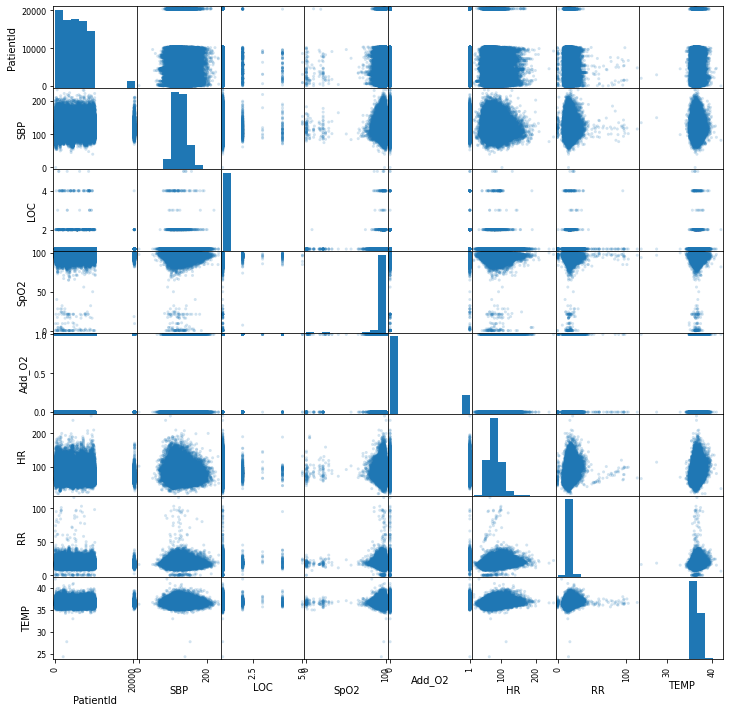

In [44]:
pd.plotting.scatter_matrix(PatientData, alpha=0.2, figsize=(12,12))

In [23]:
PatientData.corr()

,PatientId,SBP,LOC,SpO2,Add_O2,HR,RR,TEMP
PatientId,1.000000,0.008991,0.008168,0.026212,-0.014531,-0.058004,-0.029244,0.009569
SBP,0.008991,1.000000,-0.008473,0.007329,-0.048249,-0.059983,-0.006355,-0.018519
LOC,0.008168,-0.008473,1.000000,-0.006517,0.028562,0.017920,0.033108,0.023682
SpO2,0.026212,0.007329,-0.006517,1.000000,-0.159311,-0.126267,-0.107789,-0.074098
Add_O2,-0.014531,-0.048249,0.028562,-0.159311,1.000000,0.220988,0.202400,0.143127
HR,-0.058004,-0.059983,0.017920,-0.126267,0.220988,1.000000,0.274545,0.267787
RR,-0.029244,-0.006355,0.033108,-0.107789,0.202400,0.274545,1.000000,0.174443
TEMP,0.009569,-0.018519,0.023682,-0.074098,0.143127,0.267787,0.174443,1.000000


In [31]:
DataSubset = df[['SBP', 'LOC', 'SpO2', 'Add_O2', 'HR', 'RR', 'TEMP']]
DataSubset.shape

(160938, 7)

array([[<AxesSubplot:xlabel='SBP', ylabel='SBP'>,
        <AxesSubplot:xlabel='LOC', ylabel='SBP'>,
        <AxesSubplot:xlabel='SpO2', ylabel='SBP'>,
        <AxesSubplot:xlabel='Add_O2', ylabel='SBP'>,
        <AxesSubplot:xlabel='HR', ylabel='SBP'>,
        <AxesSubplot:xlabel='RR', ylabel='SBP'>,
        <AxesSubplot:xlabel='TEMP', ylabel='SBP'>],
       [<AxesSubplot:xlabel='SBP', ylabel='LOC'>,
        <AxesSubplot:xlabel='LOC', ylabel='LOC'>,
        <AxesSubplot:xlabel='SpO2', ylabel='LOC'>,
        <AxesSubplot:xlabel='Add_O2', ylabel='LOC'>,
        <AxesSubplot:xlabel='HR', ylabel='LOC'>,
        <AxesSubplot:xlabel='RR', ylabel='LOC'>,
        <AxesSubplot:xlabel='TEMP', ylabel='LOC'>],
       [<AxesSubplot:xlabel='SBP', ylabel='SpO2'>,
        <AxesSubplot:xlabel='LOC', ylabel='SpO2'>,
        <AxesSubplot:xlabel='SpO2', ylabel='SpO2'>,
        <AxesSubplot:xlabel='Add_O2', ylabel='SpO2'>,
        <AxesSubplot:xlabel='HR', ylabel='SpO2'>,
        <AxesSubplot:xlabel='RR', 

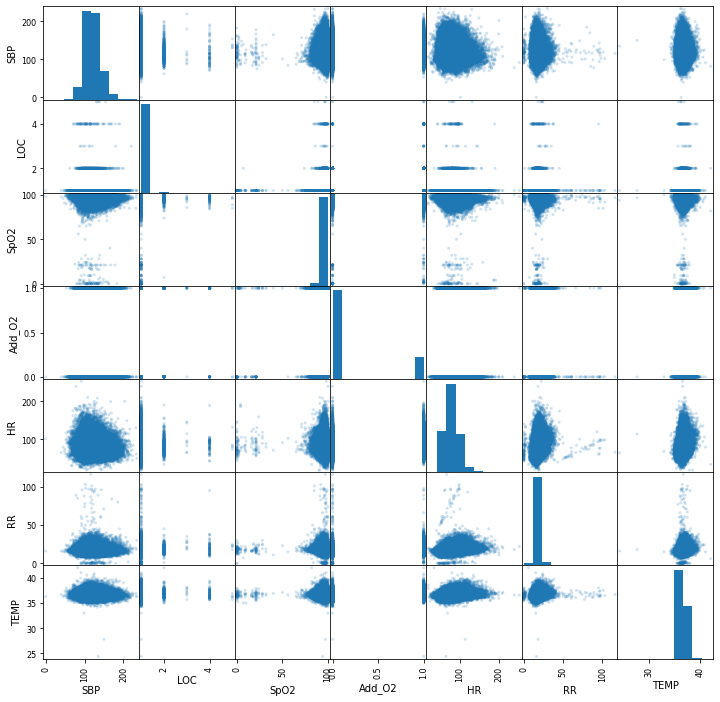

In [45]:
pd.plotting.scatter_matrix(DataSubset, alpha=0.2, figsize=(12,12))

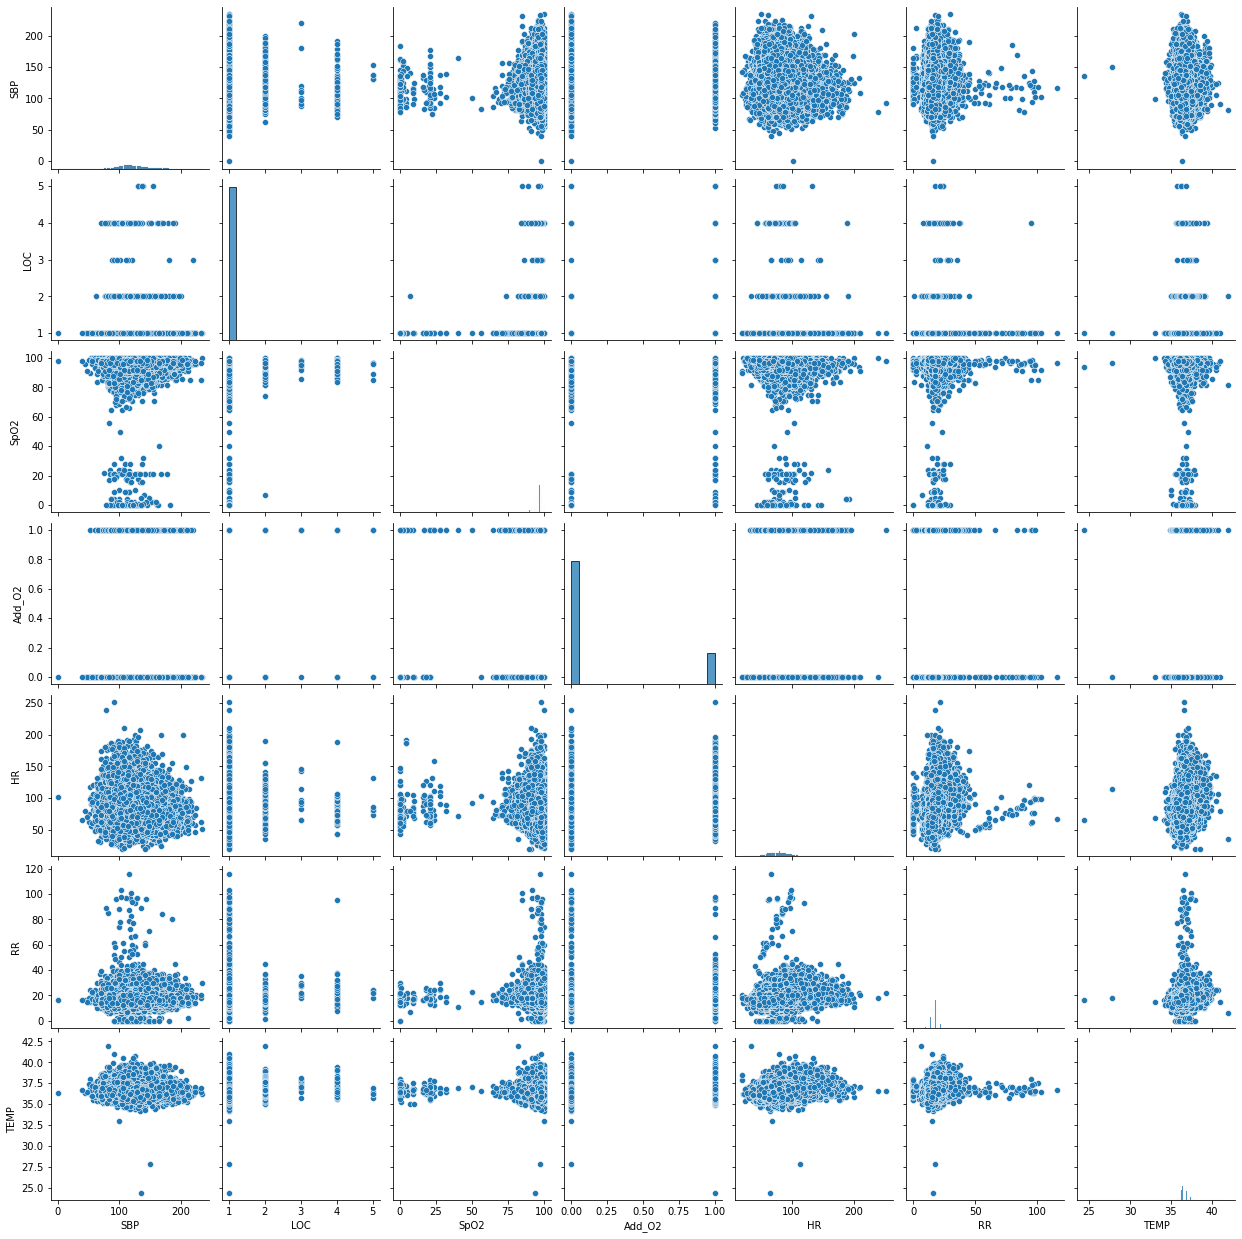

In [26]:
import seaborn as sns

sns.pairplot(DataSubset, diag_kind="hist")

In [25]:
DataSubset.corr()

,SBP,LOC,SpO2,Add_O2,HR,RR,TEMP
SBP,1.000000,-0.008473,0.007329,-0.048249,-0.059983,-0.006355,-0.018519
LOC,-0.008473,1.000000,-0.006517,0.028562,0.017920,0.033108,0.023682
SpO2,0.007329,-0.006517,1.000000,-0.159311,-0.126267,-0.107789,-0.074098
Add_O2,-0.048249,0.028562,-0.159311,1.000000,0.220988,0.202400,0.143127
HR,-0.059983,0.017920,-0.126267,0.220988,1.000000,0.274545,0.267787
RR,-0.006355,0.033108,-0.107789,0.202400,0.274545,1.000000,0.174443
TEMP,-0.018519,0.023682,-0.074098,0.143127,0.267787,0.174443,1.000000


Data correlation between de base data is very low.

Check correlation between base data and target EWS value:

In [27]:
DataSubsetWithEWS = df[['SBP', 'LOC', 'SpO2', 'Add_O2', 'HR', 'RR', 'TEMP', 'EWS_Total']]

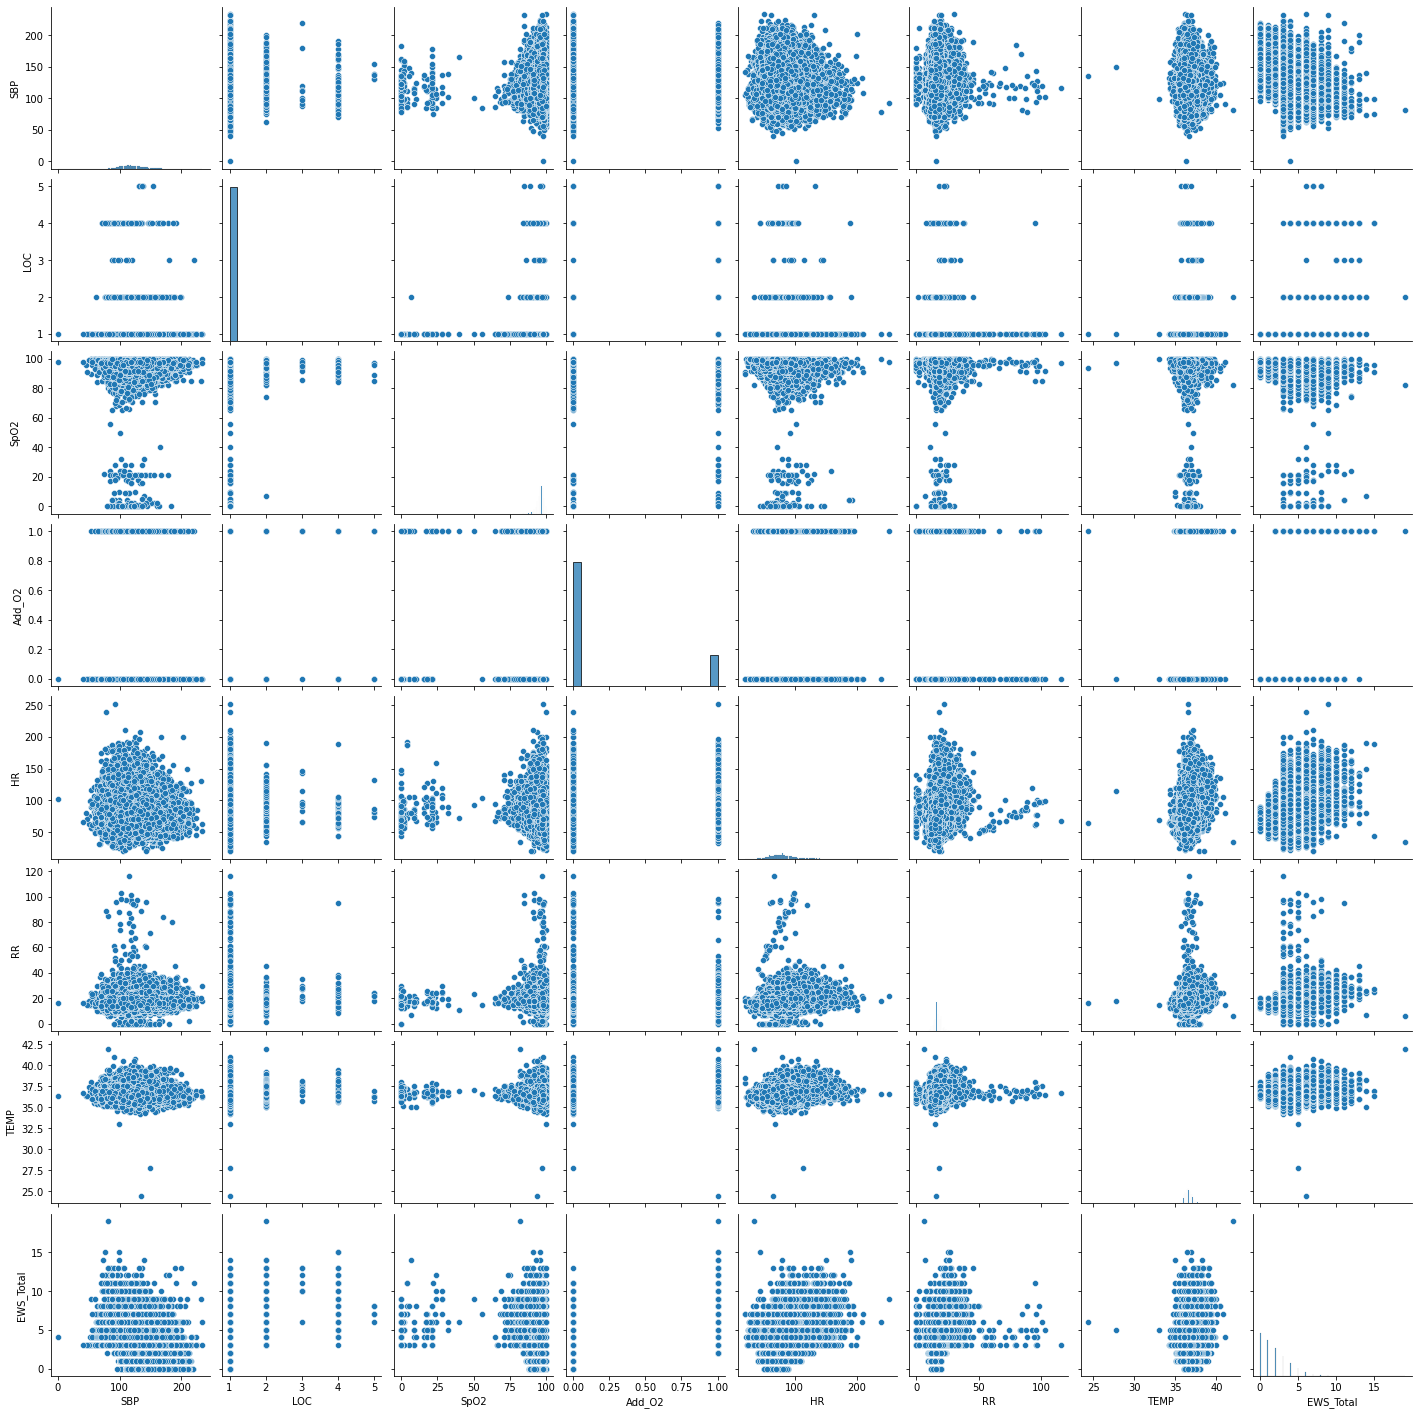

In [28]:
sns.pairplot(DataSubsetWithEWS, diag_kind="hist")

In [29]:
DataSubsetWithEWS.corr()

,SBP,LOC,SpO2,Add_O2,HR,RR,TEMP,EWS_Total
SBP,1.000000,-0.008473,0.007329,-0.048249,-0.059983,-0.006355,-0.018519,-0.351368
LOC,-0.008473,1.000000,-0.006517,0.028562,0.017920,0.033108,0.023682,0.132524
SpO2,0.007329,-0.006517,1.000000,-0.159311,-0.126267,-0.107789,-0.074098,-0.272373
Add_O2,-0.048249,0.028562,-0.159311,1.000000,0.220988,0.202400,0.143127,0.615690
HR,-0.059983,0.017920,-0.126267,0.220988,1.000000,0.274545,0.267787,0.419069
RR,-0.006355,0.033108,-0.107789,0.202400,0.274545,1.000000,0.174443,0.387121
TEMP,-0.018519,0.023682,-0.074098,0.143127,0.267787,0.174443,1.000000,0.131000
EWS_Total,-0.351368,0.132524,-0.272373,0.615690,0.419069,0.387121,0.131000,1.000000


Correlation between the base data and the target EWS value is average to low:

- Add_O2:  61,5%
- HR:      41,9%
- RR:      38,7%
- SBP:    -35,1%
- Sp02:   -27,2%
- LOC:     13,2%
- TEMP:    13,1%

## Modelling the data

### Multilinear regression

Since we have multiple variables, try multilinear.

#### Using the sklearn module

##### Normalize the Data

In [35]:
import sklearn
from sklearn_pandas import DataFrameMapper

DFmapper = DataFrameMapper([
                              (['SBP'], sklearn.preprocessing.StandardScaler()),
                              (['LOC'], sklearn.preprocessing.StandardScaler()),
                              (['SpO2'], sklearn.preprocessing.StandardScaler()),
                              (['Add_O2'], sklearn.preprocessing.StandardScaler()),
                              (['HR'], sklearn.preprocessing.StandardScaler()),
                              (['RR'], sklearn.preprocessing.StandardScaler()),
                              (['TEMP'], sklearn.preprocessing.StandardScaler())
                           ])

PreProcessedData = np.round(DFmapper.fit_transform(DataSubset), 5)
PreProcessedData

array([[ 1.13837, -0.05244,  0.00618, ...,  0.02314,  0.23143, -0.08649],
       [-0.1882 , -0.05244, -0.26599, ..., -0.26643, -0.97634,  1.38669],
       [ 0.73019, -0.05244,  0.27836, ...,  0.54437, -0.97634, -1.13876],
       ...,
       [-0.13718, -0.05244,  0.55054, ...,  0.13897,  0.83531, -0.92831],
       [ 0.42406, -0.05244,  0.55054, ..., -0.55599, -0.37246, -0.29694],
       [ 0.62815, -0.05244,  0.55054, ...,  0.2548 , -0.6744 , -1.55967]])

##### Split the dataset

X_train, y_train: subset of variables to train the regression model
X_test, y_test: remaining subset of data to verify the model

In [36]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(PreProcessedData, EWS, random_state=41, test_size=0.2)

print(X_train, X_test, y_train, y_test)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

[[-0.39229 -0.05244 -3.53212 ...  1.23933  0.83531  0.12396]
 [-1.8209  -0.05244  0.55054 ...  0.02314  0.53337 -0.92831]
 [ 0.37304 -0.05244  0.00618 ... -0.72973  1.4392  -0.29694]
 ...
 [-0.85149 -0.05244 -0.53817 ...  0.89185 -0.07051 -0.29694]
 [ 0.11793 -0.05244 -0.53817 ...  0.08106  0.53337  0.54487]
 [-0.59638 -0.05244  0.27836 ... -1.83009 -0.37246 -0.5074 ]] [[-1.05557 -0.05244 -1.08253 ... -0.20851  0.23143  1.59714]
 [ 0.21997 -0.05244 -0.81035 ... -1.30887  1.13725  2.01805]
 [ 0.9853  -0.05244  1.09489 ... -0.09268  0.23143  0.33442]
 ...
 [ 0.01589 -0.05244  0.00618 ...  0.54437  0.23143 -0.5074 ]
 [-0.59638 -0.05244  0.55054 ... -0.96139  0.53337  0.33442]
 [-0.59638 -0.05244 -0.26599 ...  0.02314  2.34502 -0.08649]]         EWS_Total
120941          6
154780          3
84059           2
111882          0
100677          0
...           ...
57536           2
114331          7
65904           5
141067          1
37447           2

[128750 rows x 1 columns]         EWS_T

#####  Load and fit the model

1. Import LinearRegression from sklearn
2. Create a regressor variable and instantiate your LinearRegression class.
3. Train the model with X_train and y_train
4. Display the score of the model with X_train and y_train.
5. Use the predict method of the model on the test dataset (X_test).
6. Display the score of the model with X_test and y_test.

In [64]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline

LinRegTrain = LinearRegression().fit(X_train, y_train)
print("Score Training set = ", LinRegTrain.score(X_train, y_train))
print("Score Test set = ", LinRegTrain.score(X_test, y_test))
print(LinRegTrain.coef_, LinRegTrain.coef_.shape)
#theta = list(LinRegTrain.coef_)
theta = list(np.concatenate(LinRegTrain.coef_))
print("Theta = ", theta, len(theta))
theta.insert(0, LinRegTrain.intercept_)
#theta = np.array(theta, dtype=object)
theta = np.array(theta)
theta = theta.reshape(len(theta),1) 
print("Theta = ", theta, theta.shape)

Score Training set =  0.6367128083157966
Score Test set =  0.6281824755688746
[[-0.58124196  0.1922781  -0.27166485  0.90895326  0.4250486   0.39768115
  -0.1055404 ]] (1, 7)
Theta =  [-0.5812419633681822, 0.19227810098090437, -0.27166485157086223, 0.9089532577448111, 0.425048598550258, 0.39768115244713353, -0.105540396416482] 7
Theta =  [[array([1.89361495])]
 [-0.5812419633681822]
 [0.19227810098090437]
 [-0.27166485157086223]
 [0.9089532577448111]
 [0.425048598550258]
 [0.39768115244713353]
 [-0.105540396416482]] (8, 1)


/usr/lib/python3.6/site-packages/ipykernel_launcher.py:14: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  


In [76]:
y_pred_train = LinRegTrain.predict(X_train)

display(np.round(y_pred_train), y_train)

y_pred = LinRegTrain.predict(X_test)
print("Score Prediction = ", LinRegTrain.score(X_test, y_pred))

RMSEtrain = np.sqrt(np.sum(np.square(y_pred_train - y_train)))
RMSEtest = np.sqrt(np.sum(np.square(y_pred - y_test)))

print("Root Mean Square Error :\n Train = ", RMSEtrain, "\n Test = ", RMSEtest)

RMSEtrainRounded = np.sqrt(np.sum(np.square(np.round(y_pred_train) - y_train)))
RMSEtestRounded = np.sqrt(np.sum(np.square(np.round(y_pred) - y_test)))

print("Root Mean Square Error on rounded values :\n Train = ", RMSEtrainRounded, "\n Test = ", RMSEtestRounded)

array([[6.],
       [3.],
       [2.],
       ...,
       [5.],
       [2.],
       [1.]])

,EWS_Total
120941,6
154780,3
84059,2
111882,0
100677,0
...,...
57536,2
114331,7
65904,5
141067,1


Score Prediction =  1.0
Root Mean Square Error :
 Train =  EWS_Total    402.352352
dtype: float64 
 Test =  EWS_Total    202.991692
dtype: float64
Root Mean Square Error on rounded values :
 Train =  EWS_Total    415.149371
dtype: float64 
 Test =  EWS_Total    209.864242
dtype: float64


In [67]:
import numpy as np

def AddOnes(Arr):
    # Add a column of 1's on the right of an array
    
    Help = np.ones((Arr.shape[0], 1))
    X = np.concatenate((Arr, Help), axis=1)
    return(X)

def MSE(X, y, theta):
    #print(X.shape, y.shape, theta.shape)
    m = X.shape[0]
    #help1 = np.matmul(AddOnes(X),theta)
    help1 = np.matmul(X, theta)
    #help2 = np.subtract( help1, y.reshape(len(y),1) ) # y is a vector, convert to 1-dim array
    help2 = help1 - y
    #print(X.shape, y.shape, theta.shape, help1.shape, help2.shape)
    
    return(1/(2*m) * sum(help2**2) )

In [114]:
y_pred = LinRegTrain.predict(X_test)
print("Score prediction = ", LinRegTrain.score(X_test, y_pred))

print("MSE = ", MSE(AddOnes(X_test), y_pred, theta) )

Score prediction =  1.0
MSE =  [array([6.39149089])]


###### Accuracy analysis: 

In [78]:
y_pred_train == y_train

,EWS_Total
120941,False
154780,False
84059,False
111882,False
100677,False
...,...
57536,False
114331,False
65904,False
141067,False


In [102]:
def MatchScore(Predictions, Actual):
    # List number of accurate, 1 off, 2 off, etc predicted EWS values
    
    Difference = np.abs(Predictions - Actual)
    #print(Difference)    
    Unique, Counts = np.unique(Difference, return_counts=True)
    
    return( dict(zip(Unique, Counts)) )
    

In [ ]:
###### Rounding

In [103]:
#print(y_pred_train.shape, y_train.shape)
#print(y_pred_train.dtype, y_train.dtypes)

TrainScore = MatchScore(np.round(y_pred_train), y_train.to_numpy())
print(TrainScore)

#print(y_pred.shape, y_test.shape)

TestScore = MatchScore(np.round(y_pred), y_test.to_numpy())
print(TestScore)

{0.0: 44838, 1.0: 64438, 2.0: 15711, 3.0: 2763, 4.0: 723, 5.0: 187, 6.0: 64, 7.0: 15, 8.0: 8, 9.0: 1, 10.0: 1, 15.0: 1}
{0.0: 11135, 1.0: 16056, 2.0: 4011, 3.0: 701, 4.0: 202, 5.0: 58, 6.0: 21, 7.0: 4}


In [115]:
#Percentages:
print("Train - Fraction Accurate = ", (TrainScore[0.0])/ y_pred_train.shape[0])
print("Train - Fraction Accurate or 1 off = ", (TrainScore[0.0] + TrainScore[1.0])/ y_pred_train.shape[0])
print("Train - Fraction Accurate or max 2 off = ", (TrainScore[0.0] + TrainScore[1.0] + TrainScore[2.0])/ y_pred_train.shape[0])
print("Test - Fraction Accurate = ", (TestScore[0.0])/ y_test.shape[0])
print("Test - Fraction Accurate or 1 off = ", (TestScore[0.0] + TestScore[1.0])/y_test.shape[0])
print("Test - Fraction Accurate or max 2 off = ", (TestScore[0.0] + TestScore[1.0] + TestScore[2.0])/y_test.shape[0])

Train - Fraction Accurate =  0.34825631067961166
Train - Fraction Accurate or 1 off =  0.8487456310679612
Train - Fraction Accurate or max 2 off =  0.9707728155339805
Test - Fraction Accurate =  0.3459363738039021
Test - Fraction Accurate or 1 off =  0.8447558096184914
Test - Fraction Accurate or max 2 off =  0.9693674661364484


In [ ]:
##### Ceiling:

In [110]:
TrainScore2 = MatchScore(np.ceil(y_pred_train), y_train.to_numpy())
print(TrainScore2)

TestScore2 = MatchScore(np.ceil(y_pred), y_test.to_numpy())
print(TestScore2)

{0.0: 35303, 1.0: 63989, 2.0: 26336, 3.0: 2538, 4.0: 395, 5.0: 126, 6.0: 35, 7.0: 17, 8.0: 5, 9.0: 4, 11.0: 1, 14.0: 1}
{0.0: 8678, 1.0: 15989, 2.0: 6692, 3.0: 670, 4.0: 105, 5.0: 39, 6.0: 12, 7.0: 3}


In [116]:
#Percentages:
print("Train - Fraction Accurate = ", (TrainScore2[0.0])/ y_pred_train.shape[0])
print("Train - Fraction Accurate or 1 off = ", (TrainScore2[0.0] + TrainScore2[1.0])/ y_pred_train.shape[0])
print("Train - Fraction Accurate or max 2 off = ", (TrainScore2[0.0] + TrainScore2[1.0] + TrainScore2[2.0])/ y_pred_train.shape[0])
print("Test - Fraction Accurate = ", (TestScore2[0.0])/ y_test.shape[0])
print("Test - Fraction Accurate or 1 off = ", (TestScore2[0.0] + TestScore2[1.0])/y_test.shape[0])
print("Test - Fraction Accurate or max 2 off = ", (TestScore2[0.0] + TestScore2[1.0] + TestScore2[2.0])/y_test.shape[0])

Train - Fraction Accurate =  0.27419805825242716
Train - Fraction Accurate or 1 off =  0.7712
Train - Fraction Accurate or max 2 off =  0.9757514563106796
Test - Fraction Accurate =  0.2696035789735305
Test - Fraction Accurate or 1 off =  0.7663414937243693
Test - Fraction Accurate or max 2 off =  0.9742450602709084


In [ ]:
##### Flooring:

In [112]:
TrainScore3 = MatchScore(np.floor(y_pred_train), y_train.to_numpy())
print(TrainScore3)

TestScore3 = MatchScore(np.floor(y_pred), y_test.to_numpy())
print(TestScore3)

{0.0: 48558, 1.0: 56694, 2.0: 16657, 3.0: 4988, 4.0: 1351, 5.0: 367, 6.0: 95, 7.0: 23, 8.0: 13, 9.0: 2, 10.0: 1, 15.0: 1}
{0.0: 12216, 1.0: 14095, 2.0: 4103, 3.0: 1289, 4.0: 352, 5.0: 95, 6.0: 28, 7.0: 8, 8.0: 2}


In [117]:
#Percentages:
print("Train - Fraction Accurate = ", (TrainScore3[0.0])/ y_pred_train.shape[0])
print("Train - Fraction Accurate or 1 off = ", (TrainScore3[0.0] + TrainScore3[1.0])/ y_pred_train.shape[0])
print("Train - Fraction Accurate or max 2 off = ", (TrainScore3[0.0] + TrainScore3[1.0] + TrainScore3[2.0])/ y_pred_train.shape[0])
print("Test - Fraction Accurate = ", (TestScore3[0.0])/ y_test.shape[0])
print("Test - Fraction Accurate or 1 off = ", (TestScore3[0.0] + TestScore3[1.0])/y_test.shape[0])
print("Test - Fraction Accurate or max 2 off = ", (TestScore3[0.0] + TestScore3[1.0] + TestScore3[2.0])/y_test.shape[0])

Train - Fraction Accurate =  0.3771495145631068
Train - Fraction Accurate or 1 off =  0.8174912621359224
Train - Fraction Accurate or max 2 off =  0.9468660194174757
Test - Fraction Accurate =  0.37952031813098047
Test - Fraction Accurate or 1 off =  0.8174164284826644
Test - Fraction Accurate or max 2 off =  0.9448862930284578


#### Conclusion Multilinear regression

Base data : 'SBP', 'LOC', 'SpO2', 'Add_O2', 'HR', 'RR', 'TEMP'

Target value: EWS_Total

When rounding the predicted value to get the EWS (int) value the:

      - Accurate predictions are approx. 35%

      - With the EWS score 1 different included we get approx. 85%
      
      - With the EWS score 1 or 2 different included we get approx. 97%
            
Multilinear regression seems close but needs improvements to be really good.